In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv") # extracting the data set.
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.info()     # geeting the details information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Above is "Advertising Sales Channel Prediction" where we need to predict the total sales. So, the TV, radio and newspapaer are our independent variables or we can say these are the features, while 'sales' is our dependent variable or in other word it's the target variable for our data set.
we can see Unnamed: 0 columns, which most probably the id or index type of column, which we will get rid of anyways while processing the data for model building.

In [4]:
data.isnull().sum()   # checking for null values

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

we did not observe any null value in the dataset , its is safe to proceed


In [5]:
# checking the statistics description of the data set.
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


We can observe that the min value for radio is zero , it means we have zero values in the radio, which we need to fix before further proceeding.
We can clearly observe from std that there is skewness present in the data. And also the sale of Tv is more than radio and newspaper.
And also we can drop the Unnamed: 0 columns, as its just numbering column.

In [6]:
#finding correlation matrix
data.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


from Here also we can say that, its safe to drop Unnamed: 0 column for model building. So let's drop it before further proceeding.


In [7]:
# dropping Column
data=data.drop(['Unnamed: 0'],axis=1 )

In [8]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
data.shape      # checking the shape of the dataset

(200, 4)

In [10]:
data.isnull().sum() # just checking once again before proceeding

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

With no null value we can proceed.

In [11]:
# finding zero in radio
np.count_nonzero(data.radio)

199

This shows that we have one zero value for radio and rest 199 values are non zero, It seems fine, that might be the case of no radio sale. So we can say that its safe to proceed.

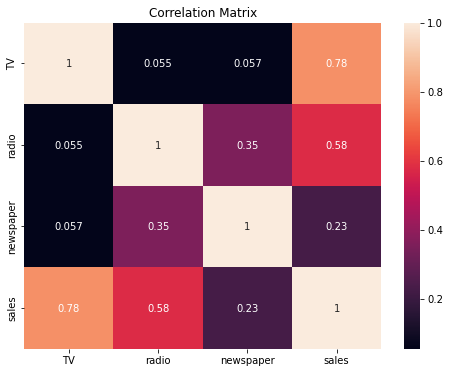

In [12]:
# visualizing the correlation between the columns.
corr=data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix')
plt.show()

From the above, we observe that, TV is highly correlated to sale, than radio and lastly newspaper. Radio and Newspaper are also correlated were as TV is not that correlated to radio and newspaper. 

In [13]:
data.sales.unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

From above, We can say that its a predictive model and we need to do regression analysis.


Outlier Analysis:


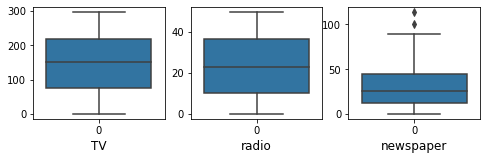

In [14]:
#Visualize the outliers using boxplot (Outlier cannot applied to categorical data, this technique can be done only in continuous data)

plt.figure(figsize=(8,7))
graph=1

for column in data:
    if graph<=3:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=12)
    graph+=1
plt.show()


from above visualization, we can observe that in Newspaper there might be outliers present.But below make any conculsion about it, First lets check the distribution of data.

<function matplotlib.pyplot.show(close=None, block=None)>

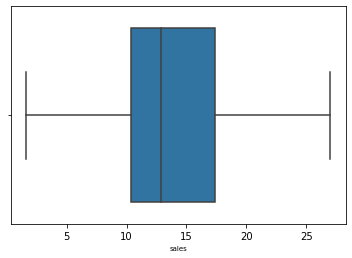

In [15]:
#Univariate analysis of target variable, i.e. sales data

plt.figure(figsize=(6,4))
sns.boxplot(data.sales)
plt.xlabel('sales', fontsize= 7)
plt.show

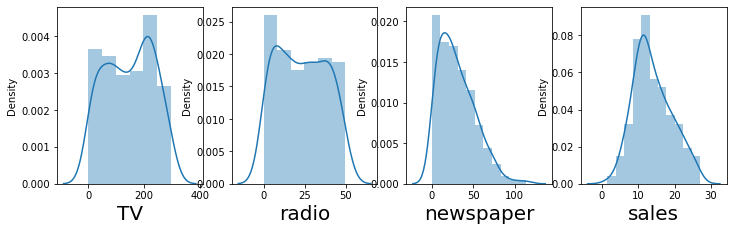

In [16]:
#let's see how our data is distributed for every coulmn

plt.figure(figsize=(12,15), facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=4:                           #as there are 4 column in the dataset
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

We can see skewness is present in our data, and the outlier in newspaper is pretty obvious. 

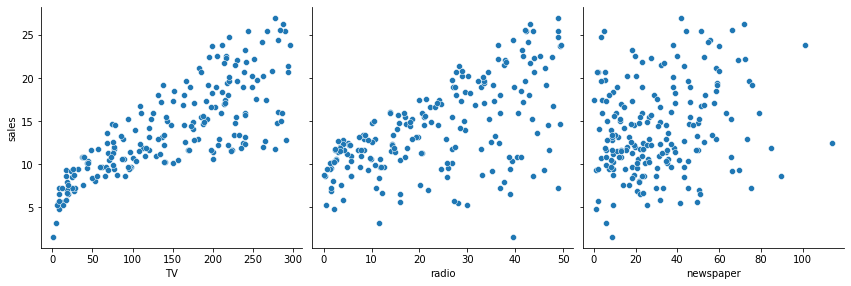

In [17]:
# seeing how sales is related to other features
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars=['sales'], height=4, aspect=1, kind='scatter')
plt.show()

From above graph, it appears that TV data set seems to be more linear as compared to other variable dispersion of values.It's begin confirm from the Correlation matrix Heatmap plotted previously.

<Figure size 720x360 with 0 Axes>

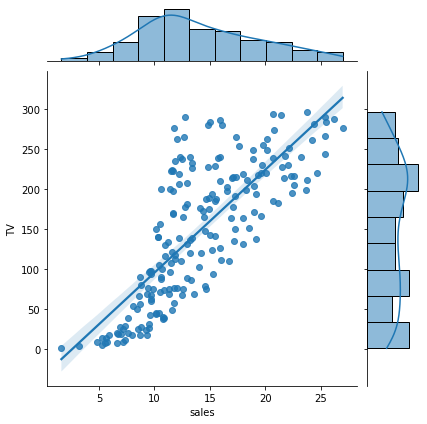

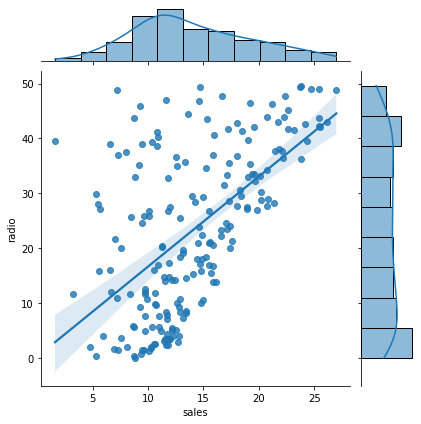

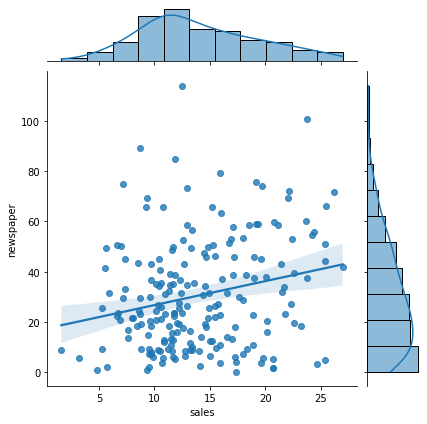

In [18]:
plt.figure(figsize=(10, 5))
sns.jointplot(data=data, x='sales', y='TV', kind='reg')
sns.jointplot(data=data, x='sales', y='radio', kind='reg')
sns.jointplot(data=data, x='sales', y='newspaper', kind='reg')

From the above joint plot we can clearly says that there is strong correlation between TV and sales. Then again we cannot overlook radio correlation and sales.

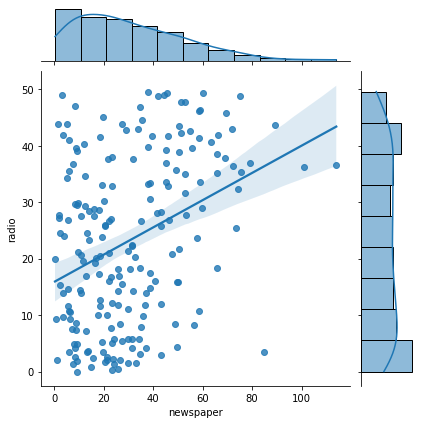

In [19]:
# correlation between radio and newspaper.

sns.jointplot(data=data, x='newspaper', y='radio', kind='reg')

from here we can observe that there are some people who are interested in newspaper and radio till now. We can simply says that there is still some population besides technological advancement still sticks tothe roots. 

In [20]:
# Find the IQR (inter quantile range) to identify outliers
from statsmodels.stats.outliers_influence import variance_inflation_factor
#1st quantile
q1= data.quantile(0.25)

#3rd quantile
q3= data.quantile(0.75)

#IQR
iqr=q3- q1

In [21]:
#Outlier detection Formula

#higher side==> q3 + (1.5 * IQR) lower side ==> q1- (1.5 * IQR)

#validating one outlier
newspaper_high=(q3.newspaper + (1.5 * iqr.newspaper))
newspaper_high

93.625

In [22]:
#check the indexes which have higher values
index= np.where(data['newspaper'] > newspaper_high)
index

(array([ 16, 101], dtype=int64),)

In [32]:
# Drop the index which we found in the above cell
data1= data.drop(data.index[index])
data1.shape

(198, 4)

In [33]:
data1.reset_index()       # reseting the index

,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
193,195,38.2,3.7,13.8,7.6
194,196,94.2,4.9,8.1,9.7
195,197,177.0,9.3,6.4,12.8
196,198,283.6,42.0,66.2,25.5


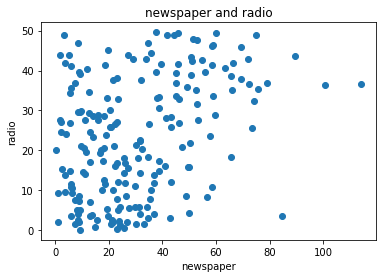

In [34]:
# checking for correlation between total sulfur dioxide and free sulphur dioxide
plt.scatter((data['newspaper']), data['radio'])
plt.ylabel('radio')
plt.xlabel('newspaper')
plt.title('newspaper and radio')
plt.show()

we cannot define proper correlation between them, the data is all over place.

In [35]:

data1.shape

(198, 4)

In [36]:
#checking for skewness
data1.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

From above we can see that newspaper data has some skewness, for this we can use log transform or boxcox to remove skewness of this column.

In [37]:
data1.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [38]:
# removing the skewness from newspaper data using boxcox
from scipy import stats
news_boxcox=stats.boxcox(data['newspaper'])[0]
pd.Series(news_boxcox).skew()

-0.08965131635982791

In [39]:
data1['newspaper']=pd.Series(news_boxcox)
data1.head()

,TV,radio,newspaper,sales
0,230.1,37.8,11.719889,22.1
1,44.5,39.3,9.400769,10.4
2,17.2,45.9,11.728438,9.3
3,151.5,41.3,10.760018,18.5
4,180.8,10.8,10.750586,12.9


In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   radio      198 non-null    float64
 2   newspaper  198 non-null    float64
 3   sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


In [41]:
data1.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

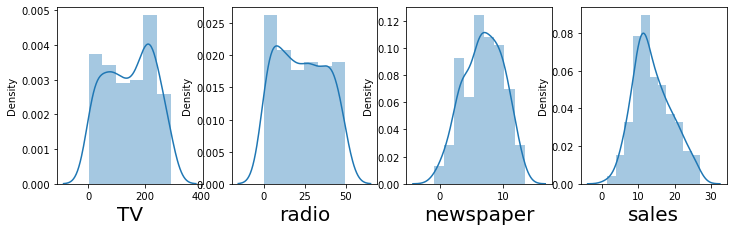

In [42]:
#Final visualization of data
#let's see how our data is distributed for every coulmn

plt.figure(figsize=(12,15), facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<=4:                           #as there are 4 column in the dataset
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

# Model Building

In [43]:
#Separating target and features variables:

X = data1.drop('sales', axis = 1) # Input/independent variable
y = data1.sales # Target / dependent variable

In [44]:
#Splitting the data into Train and Validation Set
# import train_test_split

from sklearn.model_selection import train_test_split
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_test: independent/input feature data for testing the model; will be used to predict the output values
# y_test: original dependent/output values of X_test;

In [45]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,11.719889
1,44.5,39.3,9.400769
2,17.2,45.9,11.728438
3,151.5,41.3,10.760018
4,180.8,10.8,10.750586


In [46]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [47]:
data1.isnull().sum()  #once again checking the null values 

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# Scaling the data

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scalar=scaler.fit_transform(X)

# Linear Regression

In [52]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score


In [53]:
for i in range(0,100):
    X_train,X_test,y_train,y_test= train_test_split(X_scalar,y,test_size=0.20,random_state=i)
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test= lr.predict(X_test)
    print("At random state", i , "the training accuracy is : ", {r2_score(y_train,pred_train)})
    print("At random state ", i, "the testing score is : ", {r2_score(y_test,pred_test)})
    print('\n')

At random state 0 the training accuracy is :  {0.8899848081638928}
At random state  0 the testing score is :  {0.9106705922805812}


At random state 1 the training accuracy is :  {0.8944951937600559}
At random state  1 the testing score is :  {0.8916460960835475}


At random state 2 the training accuracy is :  {0.9104908870184714}
At random state  2 the testing score is :  {0.838557018930199}


At random state 3 the training accuracy is :  {0.8945199342392895}
At random state  3 the testing score is :  {0.8977065810971957}


At random state 4 the training accuracy is :  {0.8979871033718889}
At random state  4 the testing score is :  {0.8728152450122314}


At random state 5 the training accuracy is :  {0.8992934783620696}
At random state  5 the testing score is :  {0.8623276232465955}


At random state 6 the training accuracy is :  {0.8991499668600665}
At random state  6 the testing score is :  {0.8767789215689907}


At random state 7 the training accuracy is :  {0.8909779696047117}
At 

At random state 62 the training accuracy is :  {0.9006449983970428}
At random state  62 the testing score is :  {0.8571532285597983}


At random state 63 the training accuracy is :  {0.8940765740028741}
At random state  63 the testing score is :  {0.8962746257163472}


At random state 64 the training accuracy is :  {0.8861432099059467}
At random state  64 the testing score is :  {0.9265451677324819}


At random state 65 the training accuracy is :  {0.8978411383918847}
At random state  65 the testing score is :  {0.882906229657263}


At random state 66 the training accuracy is :  {0.9000601459825528}
At random state  66 the testing score is :  {0.8766141387091261}


At random state 67 the training accuracy is :  {0.8914962979189618}
At random state  67 the testing score is :  {0.905782420213128}


At random state 68 the training accuracy is :  {0.9027875212478012}
At random state  68 the testing score is :  {0.8645890057538409}


At random state 69 the training accuracy is :  {0.8915086

from above we can say that at random state of 40,training accuracy and testing score are almost equal. so lets take random state as 40.

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.2, random_state=9)
lr.fit(X_train,y_train)
pred_test=lr.predict(X_test)
print(r2_score(y_test,pred_test))


0.9152193161831198


The r2 score is pretty decent, before finalizing, lets chcek how other models are performing.

# Cross validation

In [55]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    
    cv_score=cross_val_score(lr,X_scalar,y,cv=j)
    cv_mean=cv_score.mean()
    print("At cv fold ", j, " the Cv score is ", cv_mean, "and accuracy score for training is ", train_accuracy, "& test accuracy is", test_accuracy)
    print('\n')

At cv fold  2  the Cv score is  0.8896051911811886 and accuracy score for training is  -0.7487013001009017 & test accuracy is 0.9152193161831198


At cv fold  3  the Cv score is  0.888960037263154 and accuracy score for training is  -0.7487013001009017 & test accuracy is 0.9152193161831198


At cv fold  4  the Cv score is  0.8884850974536356 and accuracy score for training is  -0.7487013001009017 & test accuracy is 0.9152193161831198


At cv fold  5  the Cv score is  0.8858383176633795 and accuracy score for training is  -0.7487013001009017 & test accuracy is 0.9152193161831198


At cv fold  6  the Cv score is  0.8869205410783539 and accuracy score for training is  -0.7487013001009017 & test accuracy is 0.9152193161831198


At cv fold  7  the Cv score is  0.8840894975214749 and accuracy score for training is  -0.7487013001009017 & test accuracy is 0.9152193161831198


At cv fold  8  the Cv score is  0.8883306970312481 and accuracy score for training is  -0.7487013001009017 & test accur

from above we can see that cv has not much impact on accuracy so we can select 2.

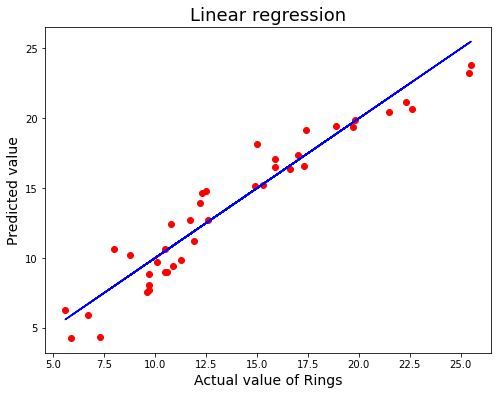

In [56]:
# here we have handled the problem of overfitting by checking the training and testing score

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual value of Rings', fontsize=14)
plt.ylabel('Predicted value', fontsize= 14)
plt.title('Linear regression', fontsize=18)
plt.show()

# Regularization:

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters= {'alpha': [.0001,.001,.01,.1,1,10], 'random_state': list(range(0,10))"C R CONSTRUCTION FRESH PROPOSAL.doc"}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [65]:
ls=Lasso(alpha= 0.01, random_state=0)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)
pred_ls=ls.predict(X_test)

lss=r2_score(y_test, pred_ls)
print("R2 score of Lasso is : ",lss)

# import mean squared error from sklearn.metric
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, pred_ls)))

R2 score of Lasso is :  0.9182923537091989
Root Mean Squared Error is:  1.4773675882698367


# Ensemble technique

In [59]:
from sklearn.ensemble import RandomForestRegressor

parameters= {'criterion':['mse', 'mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [61]:
rf=RandomForestRegressor(criterion='mae', max_features='auto')
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred_rf=rf.predict(X_test)

rfs=r2_score(y_test, pred_rf)
print('R2 score is : ',rfs)

rfscore=cross_val_score(rf,X,y,cv=7)
rfc=rfscore.mean()
print('Cross validation score is : ', rfc)

R2 score is :  0.9871938042100619
Cross validation score is :  0.9780267940006802


# saving model

In [66]:
# saving best performing model
import pickle
filename= "advertising.pkl"
pickle.dump(rf, open(filename, 'wb'))